Modelo predicción de demanda

1) Lectura y limpieza de los datos

In [1]:
## librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
np.random.seed(123)
random.seed(123)

In [2]:
## leemos los conjuntos de datos
df_features = pd.read_csv('features.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_stores = pd.read_csv('stores.csv')



In [3]:


df_features.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


Contiene datos adicionales relacionados con la tienda, el departamento y la actividad regional durante las mismas fechas del conjunto de entrenamiento. Las columnas incluidas son:

Store: Número de la tienda.
Date: Fecha correspondiente a la semana.
Temperature: Temperatura promedio de la región (en grados Fahrenheit).
Fuel_Price: Precio del combustible en la región.
MarkDown1 a MarkDown5: Datos anonimizados relacionados con promociones especiales de descuentos que se llevaron a cabo en Walmart.
CPI (Consumer Price Index): Índice de precios al consumidor, que mide los cambios mensuales en los precios pagados por los consumidores estadounidenses.

In [4]:

df_stores.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


stores.csv: Proporciona información anonimizada sobre las 45 tiendas, detallando su tipo y tamaño. Contiene las siguientes columnas:

Store: Número de tienda (del 1 al 45).
Type: Tipo de tienda, clasificada en tres categorías: A, B y C.
Size: Tamaño de la tienda (en pies cuadrados).

In [5]:
df_train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


train.csv: Datos históricos de entrenamiento, que abarcan del 5 de febrero de 2010 al 1 de noviembre de 2012. Este archivo incluye las siguientes columnas:

Store: Número de la tienda.
Dept: Número del departamento.
Date: Fecha correspondiente a la semana.
Weekly_Sales: Ventas semanales del departamento en la tienda específica.
IsHoliday: Indica si la semana corresponde a una semana especial por ser festiva.

In [6]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [5]:

## se juntan las tres bases de datos con un merge para tener la información consolidades

df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_stores, on=['Store'], how='inner')


df.drop(['IsHoliday_y'], axis=1,inplace=True) 

df.head(10)






,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
5,1,1,2010-03-12,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6,1,1,2010-03-19,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315
7,1,1,2010-03-26,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,A,151315
8,1,1,2010-04-02,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315
9,1,1,2010-04-09,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,A,151315


In [8]:
df.to_csv('datos.csv', index=False)

In [6]:
##  valores faltantes

print(df.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64


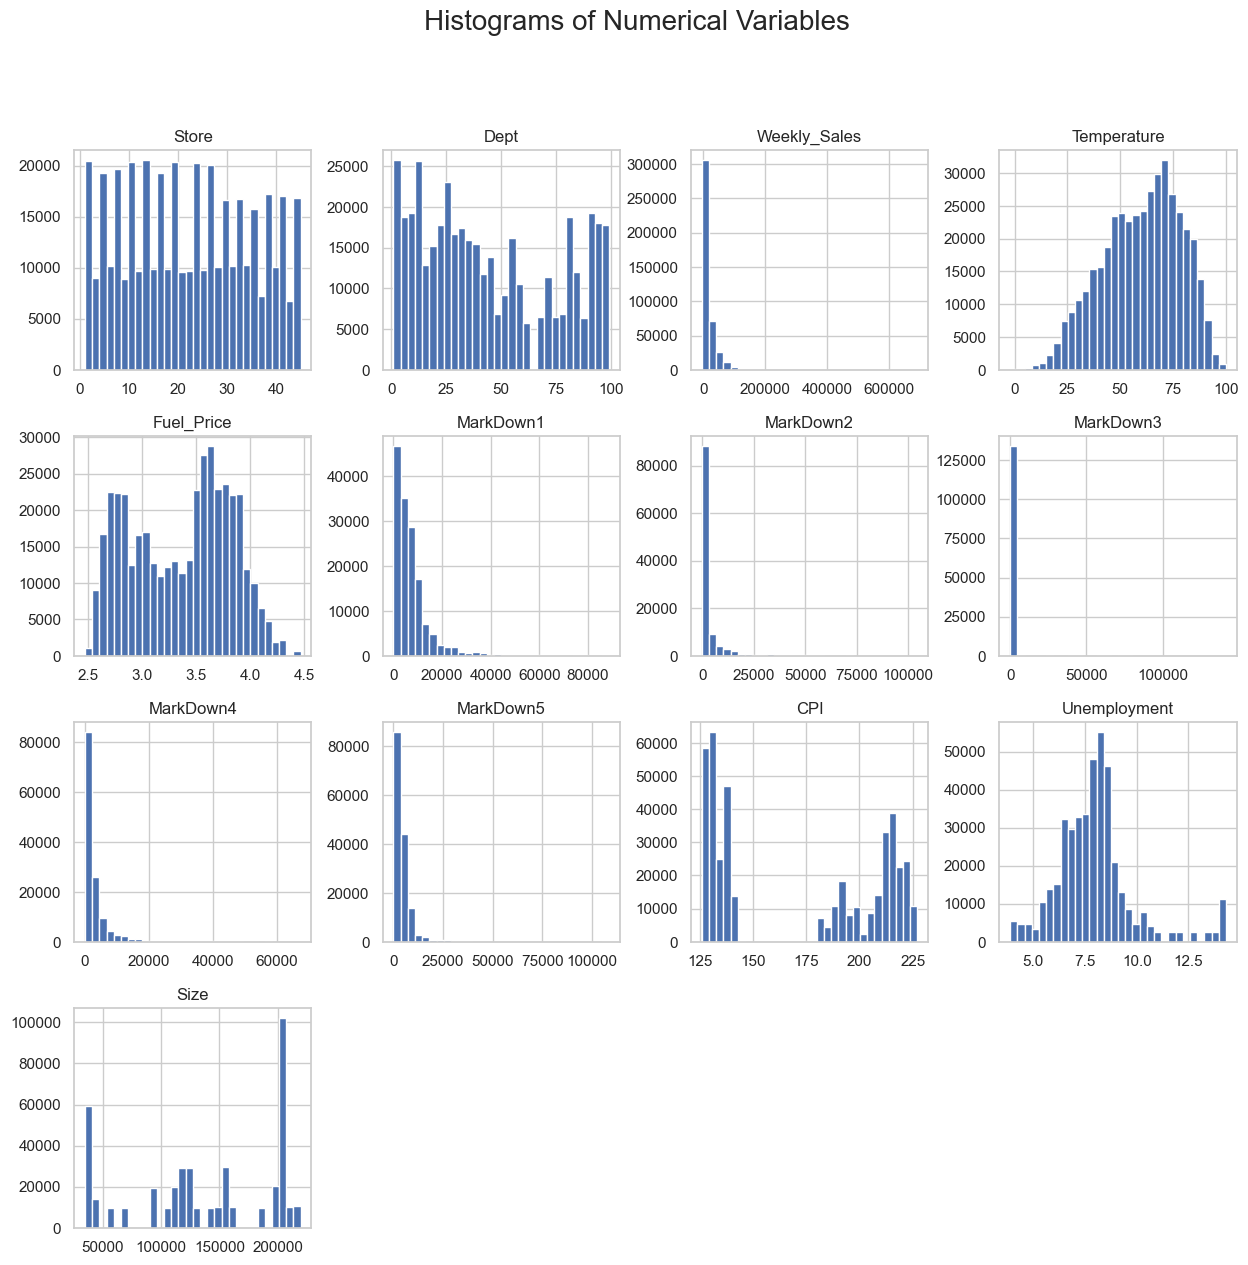

In [7]:
## Limpieza de los datos

sns.set(style="whitegrid")

# Plot histograms for numerical variables
df.hist(bins=30, figsize=(15, 14))
plt.suptitle('Histograms of Numerical Variables', fontsize=20)
plt.show()


In [8]:
## los datos vacíos en las columnas Markdown se reemplazan por Ceros, ## los datos faltantes aquí los imputamos con 0, es decir, como si ese venta no hubiese tenido descuento especial

df = df.fillna(0)

In [9]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

1358 observaciones tienen datos negativos en la columna de ventas semanales, lo cual no tiene sentido, como es el 3.19% eliminamos esos regsitros

In [11]:
count_negative = df.loc[df['Weekly_Sales'] <= 0].shape[0]

print(count_negative) ##

df = df.loc[df['Weekly_Sales'] > 0].reset_index(drop=True)

print(df.shape)


1358
(420212, 16)


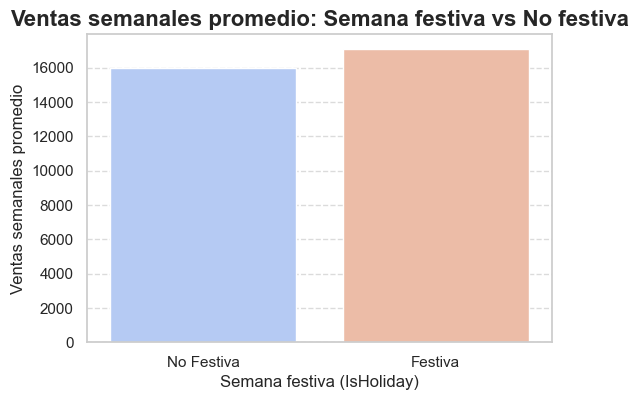

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x='IsHoliday_x', y='Weekly_Sales', data=df, palette='coolwarm', ci=None)

plt.title('Ventas semanales promedio: Semana festiva vs No festiva', fontsize=16, fontweight='bold')
plt.xlabel('Semana festiva (IsHoliday)', fontsize=12)
plt.ylabel('Ventas semanales promedio', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Festiva', 'Festiva'], fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [13]:
## miremos que fechas son holidays

df_2010_holidays = df[(df['IsHoliday_x'] == True) ]
dates_2010_holidays = df_2010_holidays['Date'].unique()
print("Fechas festivas:", dates_2010_holidays)

##podemos cambair estas fechas a esas festividades, y puede que nos mejore el modelo 

Fechas festivas: ['2010-02-12' '2010-09-10' '2010-11-26' '2010-12-31' '2011-02-11'
 '2011-09-09' '2011-11-25' '2011-12-30' '2012-02-10' '2012-09-07']


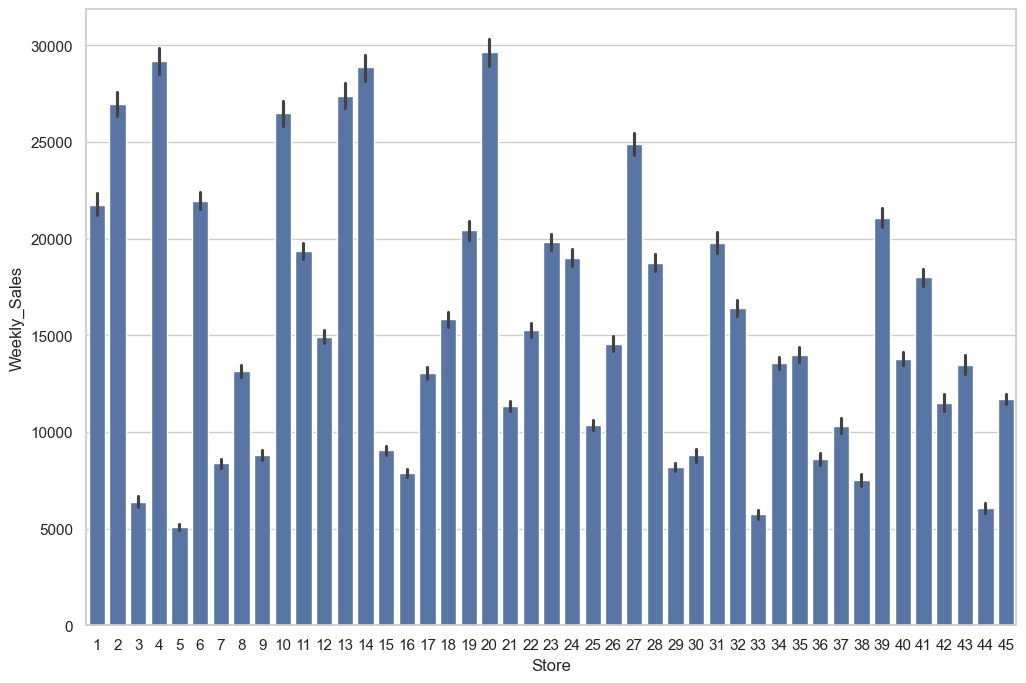

In [19]:
## ventas por departamento

plt.figure(figsize=(12,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df)
plt.show()

In [14]:
df['Date'] = pd.to_datetime(df['Date'])


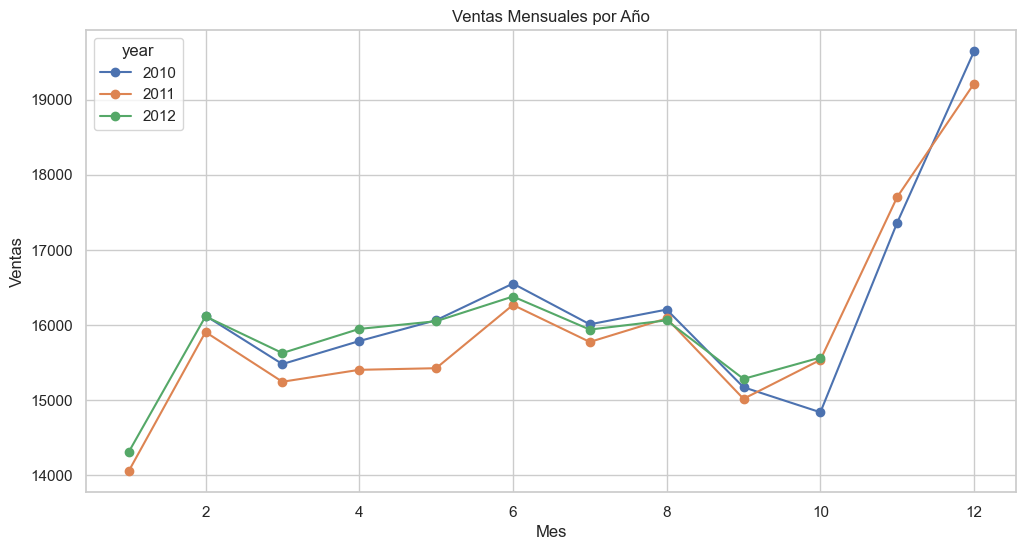

In [16]:
df["Date"] = pd.to_datetime(df["Date"])  # Convertir a datetime
df['week'] = df['Date'].dt.isocalendar().week  # Obtener la semana del año
df['month'] = df['Date'].dt.month  # Obtener el mes
df['year'] = df['Date'].dt.year  # Obtener el año

# Crear la tabla dinámica para ventas mensuales
monthly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="month")

# Graficar las ventas mensuales
monthly_sales.plot(figsize=(12, 6), marker='o', title='Ventas Mensuales por Año')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()


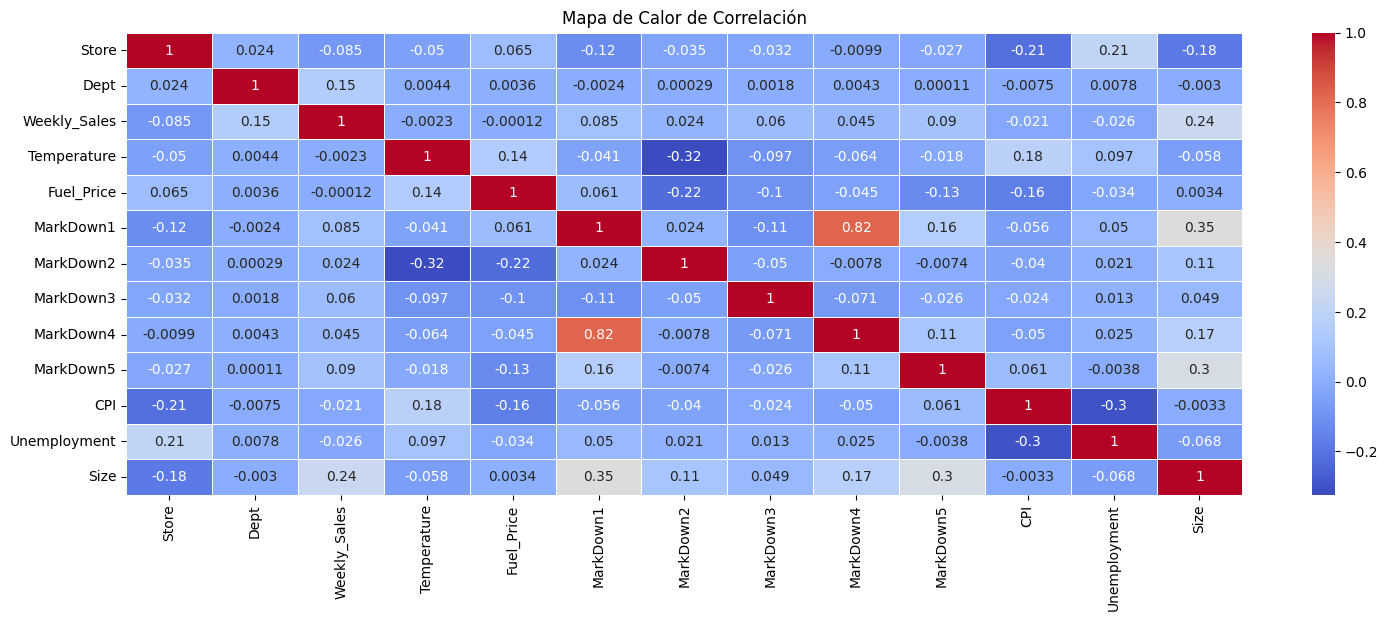

In [8]:
## Matriz de correlaciones


# Seleccionar solo columnas numéricas
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Graficar el heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()






In [21]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

weekly_sales.to_csv('nombre_del_archivo.csv', index=False)

In [ ]:
## un primer modelo en general, sin hacer énfasis por tienda o departamento.

In [22]:
## RNN para predecir

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [23]:
class TimeSeriesDataset(Dataset):
 
    def __init__(self, data, sequence_length):

        self.data = torch.FloatTensor(data)
        self.sequence_length = sequence_length

    def __len__(self):
    
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):

        sequence = self.data[idx:idx + self.sequence_length]
        target = self.data[idx + self.sequence_length]

        return sequence.view(-1, 1), target

In [24]:
def prepare_data(filename, split_date='3/30/2012',
                sequence_length=12, batch_size=32):

    # Read the CSV file

    df = pd.read_csv('sales_data (1).csv', parse_dates=['Date'])
    df = df[df['Weekly_Sales'] > 0]

    # Ordenar por tienda, depto y fecha
    df.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)
    df = filename#lit data
    df.fillna(method='ffill', inplace=True)
    train_data = df[df['Date'] < split_date]
    val_data = df[df['Date'] >= split_date]
    num_cols = train_data.select_dtypes(include=['number']).columns  

    
    # Scale the data
    scaler = MinMaxScaler()

    train_scaled  = scaler.fit_transform(train_data[num_cols])

    val_scaled = scaler.transform(val_data[num_cols])

    # Create datasets
    train_dataset = TimeSeriesDataset(train_scaled, sequence_length)
    val_dataset = TimeSeriesDataset(val_scaled, sequence_length)

    # Create dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        drop_last=False  # Drop last incomplete batch
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=len(val_scaled)-sequence_length,
        shuffle=False,
        drop_last=False
    )

    return train_loader, val_loader, scaler, train_data, val_data, train_scaled, val_scaled

In [25]:
# Prepare our data with the new functionality
torch.manual_seed(1983)
sequence_length = 12
batch_size = 12
train_loader, val_loader, scaler, train_data, val_data, train_scaled, val_scaled = prepare_data(
    filename = weekly_sales,
    sequence_length=sequence_length,
    batch_size=batch_size)

In [26]:
for batch, (X,y) in enumerate(val_loader):
  print(f"El lote de inputs tiene dinmensiones {X.shape}")
  print(f"El lote de targets tiene dimensiones {y.shape}")
  break

El lote de inputs tiene dinmensiones torch.Size([19, 12, 1])
El lote de targets tiene dimensiones torch.Size([19, 1])


In [27]:
for batch, (X,y) in enumerate(train_loader):
  print(f"Un ejemplo de inputs del lote de entrenamiento es {X}")
  print(f"Un ejemplo de targets del lote de entrenamiento es {y}")
  break

Un ejemplo de inputs del lote de entrenamiento es tensor([[[0.1304],
         [0.1097],
         [0.2619],
         [0.1879],
         [0.1351],
         [0.1242],
         [0.0993],
         [0.2154],
         [0.1386],
         [0.1336],
         [0.1974],
         [0.2562]],

        [[0.1373],
         [0.0988],
         [0.2036],
         [0.1609],
         [0.1770],
         [0.1891],
         [0.1399],
         [0.1733],
         [0.1015],
         [0.0755],
         [0.0628],
         [0.1842]],

        [[0.1242],
         [0.0993],
         [0.2154],
         [0.1386],
         [0.1336],
         [0.1974],
         [0.2562],
         [0.1990],
         [0.1941],
         [0.1696],
         [0.2254],
         [0.2008]],

        [[0.1337],
         [0.6344],
         [0.2495],
         [0.3887],
         [0.5376],
         [1.0000],
         [0.0202],
         [0.0768],
         [0.0260],
         [0.0255],
         [0.0000],
         [0.1586]],

        [[0.1607],
         [0

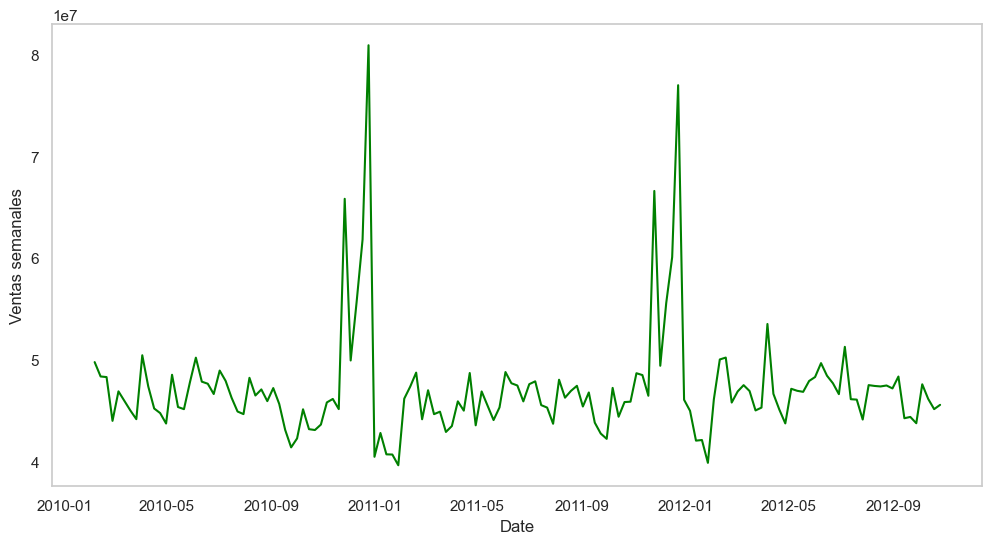

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Date'], weekly_sales['Weekly_Sales'], color='green')
plt.xlabel('Date')
plt.ylabel('Ventas semanales')
plt.grid(False)  # Desactiva la cuadrícula
plt.show()

In [29]:
class demandaRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, num_layers=2, dropout=0.2):
        super(demandaRNN, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout  # Add dropout for regularization
        )

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)

        out, h = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [30]:
# Initialize our model
import torch

# Definir el dispositivo (GPU si está disponible, de lo contrario CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Inicializar la semilla para reproducibilidad
torch.manual_seed(1983)
# Initialize our model
torch.manual_seed(1983)
model = demandaRNN().to(device)

"""A continuación se hace una prueba de escritorio para identificar si el modelo hace lo que se espera. En este caso, se introduce un lote y se obtienen predicciones."""

with torch.no_grad():
  y_pred = model(X.to(device))
print(y_pred)

tensor([[0.0729],
        [0.0706],
        [0.0667],
        [0.0719],
        [0.0636],
        [0.0621],
        [0.0686],
        [0.0692],
        [0.0689],
        [0.0687],
        [0.0691],
        [0.0685]], device='cuda:0')


In [31]:
def train_model(model, train_loader, val_loader, epochs=1000, lr=0.01):
    """
    Train the model using DataLoader for efficient batch processing

    Parameters:
    model (nn.Module): The RNN model
    train_loader (DataLoader): DataLoader for training data
    val_loader (DataLoader): DataLoader for validation data
    epochs (int): Number of training epochs
    lr (float): Learning rate

    Returns:
    dict: Training and validation losses over time
    """
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    history = {
        'train_loss': [],
        'val_loss': []
    }

    for epoch in range(epochs):
        # Training phase
        model.train() # cuando usamos dropout
        train_losses = []

        for sequences, targets in train_loader:

            outputs = model(sequences.to(device))
            loss = criterion(outputs, targets.to(device))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())

        # Validation phase
        model.eval() # cuando usamos dropout
        val_losses = []

        with torch.no_grad():
            for sequences, targets in val_loader:
                outputs = model(sequences.to(device))
                val_loss = criterion(outputs, targets.to(device))
                val_losses.append(val_loss.item())

        # Record losses
        avg_train_loss = np.mean(train_losses)
        avg_val_loss = np.mean(val_losses)
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}]')
            print(f'Training Loss: {avg_train_loss:.4f}')
            print(f'Validation Loss: {avg_val_loss:.4f}\n')

    return history

In [32]:
# Train the model with our improved training loop
history = train_model(model, train_loader, val_loader, epochs=1000, lr=0.001)

Epoch [10/1000]
Training Loss: 0.0223
Validation Loss: 0.0019

Epoch [20/1000]
Training Loss: 0.0286
Validation Loss: 0.0020

Epoch [30/1000]
Training Loss: 0.0210
Validation Loss: 0.0023

Epoch [40/1000]
Training Loss: 0.0237
Validation Loss: 0.0020

Epoch [50/1000]
Training Loss: 0.0188
Validation Loss: 0.0019

Epoch [60/1000]
Training Loss: 0.0186
Validation Loss: 0.0026

Epoch [70/1000]
Training Loss: 0.0164
Validation Loss: 0.0021

Epoch [80/1000]
Training Loss: 0.0137
Validation Loss: 0.0024

Epoch [90/1000]
Training Loss: 0.0132
Validation Loss: 0.0026

Epoch [100/1000]
Training Loss: 0.0151
Validation Loss: 0.0024

Epoch [110/1000]
Training Loss: 0.0151
Validation Loss: 0.0024

Epoch [120/1000]
Training Loss: 0.0097
Validation Loss: 0.0024

Epoch [130/1000]
Training Loss: 0.0246
Validation Loss: 0.0024

Epoch [140/1000]
Training Loss: 0.0080
Validation Loss: 0.0018

Epoch [150/1000]
Training Loss: 0.0060
Validation Loss: 0.0024

Epoch [160/1000]
Training Loss: 0.0056
Validation

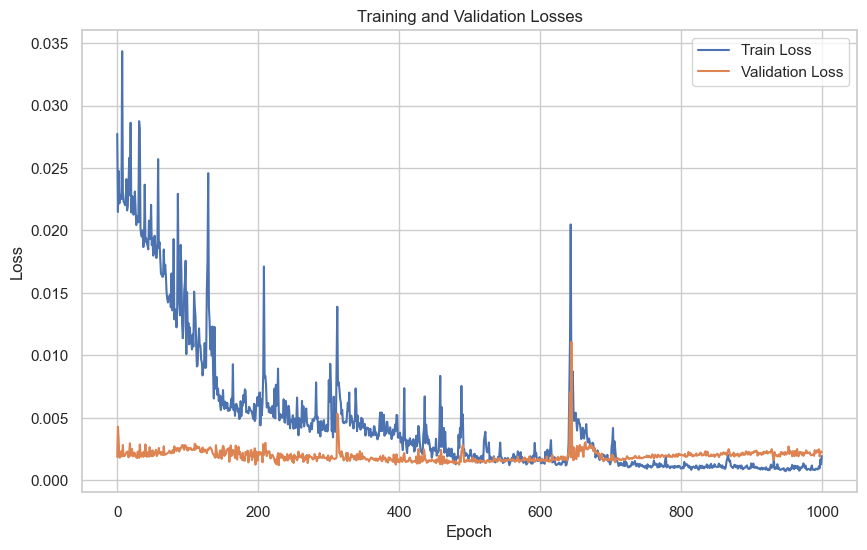

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
def predict_sequence(model, initial_sequence, n_steps, scaler):
    """
    Make predictions for n_steps ahead
    """
    model.eval()
    predictions = []
    curr_seq = initial_sequence.clone()

    for _ in range(n_steps):
        with torch.no_grad():
            pred = model(curr_seq)
            predictions.append(pred.item())

            # Update sequence for next prediction
            curr_seq = torch.cat((curr_seq[:, 1:, :], pred.reshape(1, 1, 1)), dim=1)

    # Inverse transform predictions
    predictions = np.array(predictions).reshape(-1, 1)
    predictions = scaler.inverse_transform(predictions)

    return predictions

In [35]:
model = model.cpu()

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    """
    Calculate RMSE, MAE, and MAPE for time series predictions.

    Parameters:
    y_true (numpy.array or torch.Tensor): True values
    y_pred (numpy.array or torch.Tensor): Predicted values

    Returns:
    dict: Dictionary with RMSE, MAE, and MAPE
    """
    if isinstance(y_true, torch.Tensor):
        y_true = y_true.numpy()
    if isinstance(y_pred, torch.Tensor):
        y_pred = y_pred.numpy()
    
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # Evitar divisiones por cero en MAPE
    mask = y_true != 0
    if np.any(mask):
        mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    else:
        mape = np.nan  # Si todos los valores son cero, devolver NaN
    
    return {"MAE": mae, "RMSE": rmse, "MAPE": mape}



In [56]:
# Prepare last sequence from training data
last_sequence = torch.FloatTensor(train_scaled[-sequence_length:]).reshape(1, sequence_length, 1)

# Make predictions
predictions = predict_sequence(model, last_sequence, len(val_scaled), scaler)



# Calculate metrics

actual_values = val_data['Weekly_Sales'].values.reshape(-1, 1)
metrics = calculate_metrics(actual_values, predictions)


In [57]:
from sklearn.metrics import mean_absolute_percentage_error

# Asegurar que ambas variables tengan la misma forma
actual_values = val_data['Weekly_Sales'].values.reshape(-1, 1)
predictions = np.array(predictions).reshape(-1, 1)  # Convertir a NumPy array si es necesario

# Calcular el MAPE
mape = mean_absolute_percentage_error(actual_values, predictions)

print(f"MAPE: {mape:.4f}")  # Expresar en porcentaje si es necesario


MAPE: 0.0445


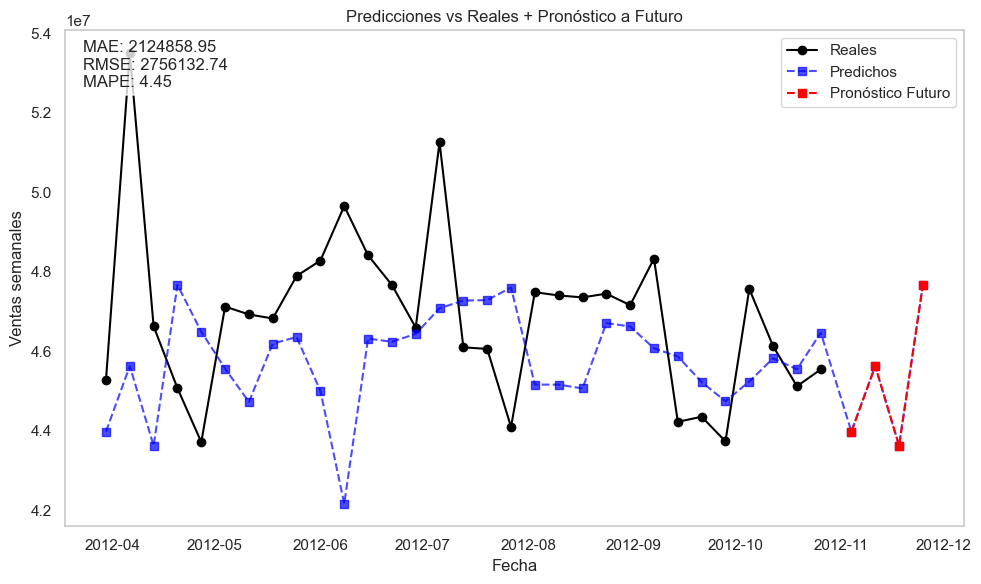

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear DataFrame con los pronósticos futuros
future_forecast = pd.DataFrame({
    'Date': ['2012-11-04', '2012-11-11', '2012-11-18', '2012-11-25'],
    'Predicted_Weekly_Sales': [4.398116e+07, 4.563024e+07, 4.362625e+07, 4.766848e+07]
})

# Convertir fechas a datetime
val_data['Date'] = pd.to_datetime(val_data['Date'])
future_forecast['Date'] = pd.to_datetime(future_forecast['Date'])

# Agregar predicciones al DataFrame original
val_data['Predicted_Weekly_Sales'] = predictions  # Asegurar que predictions tiene la misma longitud

# Concatenar los datos para hacer la línea continua
full_predictions = pd.concat([val_data[['Date', 'Predicted_Weekly_Sales']], future_forecast], ignore_index=True)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar valores reales
ax.plot(val_data['Date'], actual_values, label='Reales', marker='o', linestyle='-', color='black')

# Graficar predicciones completas con transición de azul a rojo
ax.plot(full_predictions['Date'], full_predictions['Predicted_Weekly_Sales'], 
        label='Predichos', marker='s', linestyle='--', color='blue', alpha=0.7)

# Resaltar los pronósticos futuros en rojo
ax.plot(future_forecast['Date'], future_forecast['Predicted_Weekly_Sales'], 
        marker='s', linestyle='--', color='red', label='Pronóstico Futuro')

# Configuración de la gráfica
ax.set_title('Predicciones vs Reales + Pronóstico a Futuro')
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas semanales')
ax.legend()
ax.grid(False)  # Quitar la cuadrícula

# Agregar métricas como texto en la gráfica
metrics_text = '\n'.join([f'{k}: {v:.2f}' for k, v in metrics.items()])
ax.text(0.02, 0.98, metrics_text,
        transform=ax.transAxes,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()



In [47]:
n_future_steps = 4; last_sequence = torch.FloatTensor(train_scaled[-sequence_length:]).reshape(1, sequence_length, 1); predictions = predict_sequence(model, last_sequence, n_future_steps, scaler); future_dates = pd.date_range(start=df['Date'].max(), periods=n_future_steps + 1, freq='W')[1:]; future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Weekly_Sales': predictions.flatten()}); print(future_df)


        Date  Predicted_Weekly_Sales
0 2012-11-04            4.398116e+07
1 2012-11-11            4.563024e+07
2 2012-11-18            4.362625e+07
3 2012-11-25            4.766848e+07


In [48]:
import pandas as pd

# Crear DataFrame con los pronósticos futuros
future_forecast = pd.DataFrame({
    'Date': ['2012-11-04', '2012-11-11', '2012-11-18', '2012-11-25'],
    'Predicted_Weekly_Sales': [4.398116e+07, 4.563024e+07, 4.362625e+07, 4.766848e+07]
})

# Ver el DataFrame
print(future_forecast)


         Date  Predicted_Weekly_Sales
0  2012-11-04              43981160.0
1  2012-11-11              45630240.0
2  2012-11-18              43626250.0
3  2012-11-25              47668480.0
